<a href="https://colab.research.google.com/github/himanshushakyawar/Python_AI_ML_NIT/blob/main/Decision_Tree_Blog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

In [ ]:
x1 = np.linspace(0,5,25)
x2 = np.linspace(0,5,25)
X1,X2 = np.meshgrid(x1,x2)
y = np.zeros((25,25))
for i in range(15,25):
  for j in range(15,25):
    y[i,j] = 1

https://jakevdp.github.io/PythonDataScienceHandbook/04.04-density-and-contour-plots.html

In [ ]:
X1.shape

(25, 25)

In [ ]:
import pandas as pd
df = pd.DataFrame((X1.ravel()), columns = ["x1"])
df.head()

,x1
0,0.000000
1,0.208333
2,0.416667
3,0.625000
4,0.833333


In [ ]:
df["x2"] = X2.ravel()
df["y"] = y.ravel()

In [ ]:
df.head()

,x1,x2,y
0,0.000000,0.0,0.0
1,0.208333,0.0,0.0
2,0.416667,0.0,0.0
3,0.625000,0.0,0.0
4,0.833333,0.0,0.0


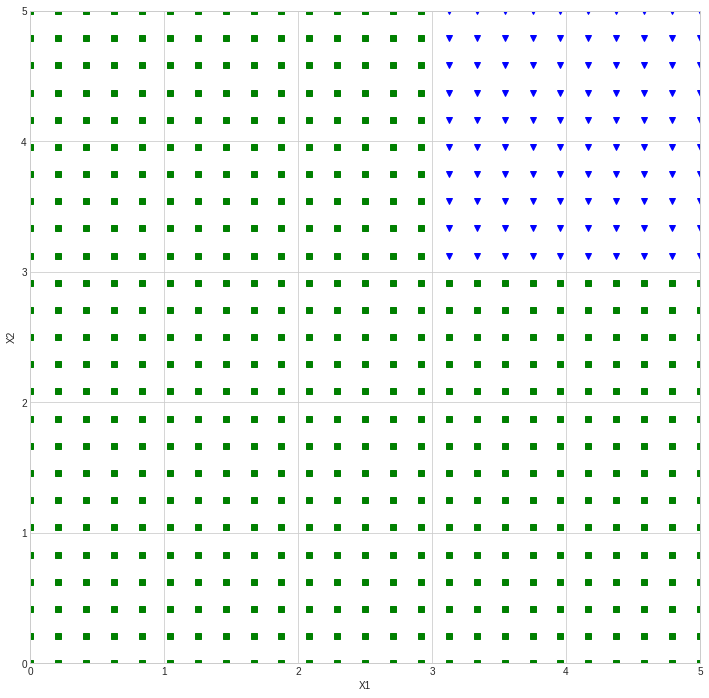

In [ ]:
plt.figure(figsize=(12,12))
plt.plot(df["x1"][df["y"] == 0],df["x2"][df["y"] == 0], "sg")
plt.plot(df["x1"][df["y"] == 1],df["x2"][df["y"] == 1], "vb")
plt.xlabel("X1")
plt.ylabel("X2")
plt.axis([0,5,0,5])
plt.show()

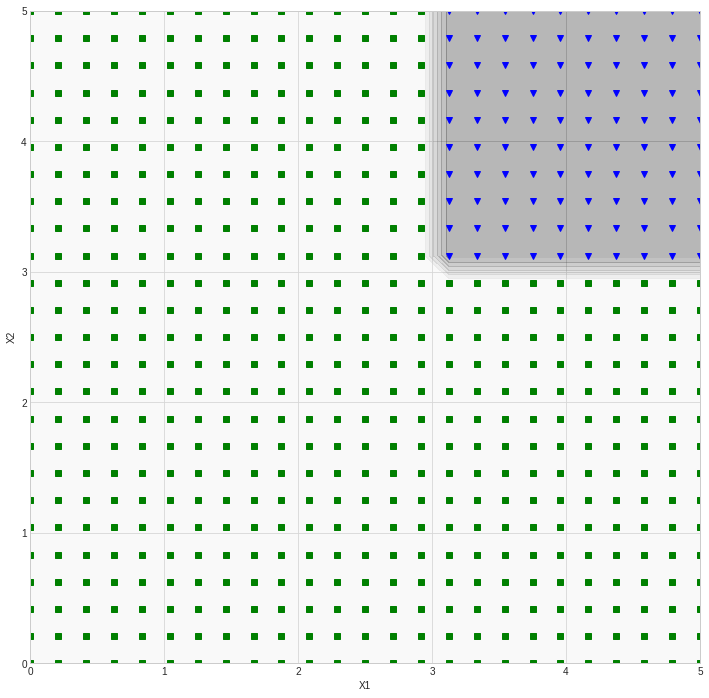

In [ ]:
plt.figure(figsize=(12,12))
X = np.column_stack([X1.ravel(),X2.ravel()])
Y = y.ravel()

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state = 42, max_depth = 2)
tree.fit(X,Y)
y_pred = tree.predict(X).reshape(X1.shape)
plt.contourf(X1,X2,y_pred,cmap = "binary",alpha = 0.3)
#plt.colorbar()
plt.plot(df["x1"][df["y"] == 0],df["x2"][df["y"] == 0], "sg")
plt.plot(df["x1"][df["y"] == 1],df["x2"][df["y"] == 1], "vb")
plt.xlabel("X1")
plt.ylabel("X2")
plt.axis([0,5,0,5])
plt.show()

In [ ]:
#Exporting the Decision Tree
from sklearn.tree import export_graphviz
import pydotplus as pdot
from IPython.display import Image

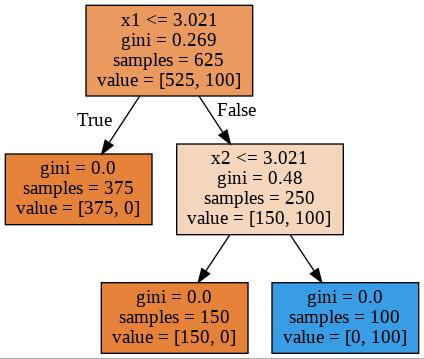

In [ ]:
export_graphviz(tree,
               out_file = "clf_tree.odt",
               feature_names = ["x1","x2"],
               filled = True)
chd_tree_graph = pdot.graphviz.graph_from_dot_file("clf_tree.odt")
chd_tree_graph.write_jpg("chd_tree_gini.png")
Image(filename = "chd_tree_gini.png")

In [ ]:
X,y = make_moons(n_samples=1000, noise = 0.1, random_state = 10)

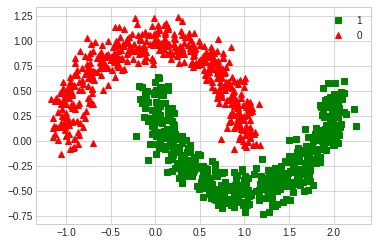

In [ ]:
plt.plot(X[:,0][y==1],X[:,1][y==1], "sg", label = "1")
plt.plot(X[:,0][y==0],X[:,1][y==0], "^r", label = "0")
plt.legend()
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
#Exporting the Decision Tree
from sklearn.tree import export_graphviz
import pydotplus as pdot
from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier

In [ ]:
export_graphviz(tree_clf,
               out_file = "clf_tree.odt",
               feature_names = ["x1","x2"],
               filled = True)

In [ ]:
chd_tree_graph = pdot.graphviz.graph_from_dot_file("clf_tree.odt")

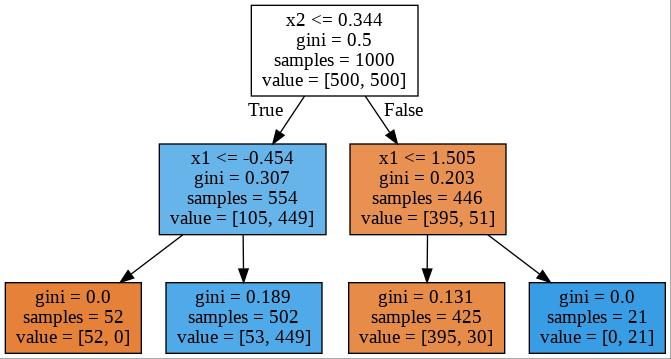

In [ ]:
chd_tree_graph.write_jpg("chd_tree_gini.png")
Image(filename = "chd_tree_gini.png")

In [ ]:
x1 = np.linspace(-1.5,2.5,100)
x2 = np.linspace(-1,1.5,100)
X1,X2 = np.meshgrid(x1,x2)

In [ ]:
tree_clf.get_depth()

2

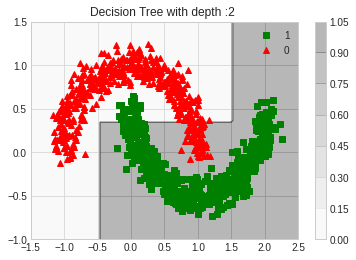

In [ ]:
X_test = np.column_stack((X1.ravel(),X2.ravel()))
y_pred = tree_clf.predict(X_test).reshape(X1.shape)
plt.plot(X[:,0][y==1],X[:,1][y==1], "sg", label = "1")
plt.plot(X[:,0][y==0],X[:,1][y==0], "^r", label = "0")
plt.contourf(X1,X2,y_pred,cmap = "binary", alpha = 0.3)
plt.title("Decision Tree with depth :{} ".format(tree_clf.get_depth()))
plt.colorbar()
plt.legend()
plt.show()

In [ ]:
def plot_predictions(model):
  x1 = np.linspace(-2,3,100)
  x2 = np.linspace(-1,1.5,100)
  X1,X2 = np.meshgrid(x1,x2)
  X_test = np.column_stack((X1.ravel(),X2.ravel()))
  y_pred = model.predict(X_test).reshape(X1.shape)
  plt.contourf(X1,X2,y_pred,cmap = "viridis", alpha = 0.3)
  plt.title("Decision Bounndry with depth : {0}".format(model.get_depth()))
  plt.colorbar()

In [ ]:
def create_plot():
  plt.plot(X[:,0][y==1],X[:,1][y==1], "sg", label = "1")
  plt.plot(X[:,0][y==0],X[:,1][y==0], "^r", label = "0")
  plt.legend()

In [ ]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
tree_clf.get_depth()

2

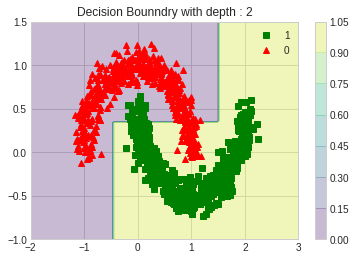

In [ ]:
plot_predictions(tree_clf)
create_plot()
plt.show()

In [ ]:
X,y = make_moons(n_samples=100, noise = 0.3, random_state = 10)

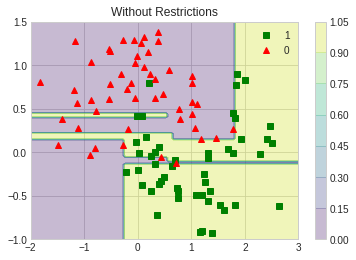

In [ ]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X,y)
plot_predictions(tree_clf)
create_plot()
plt.title("Without Restrictions")
plt.show()

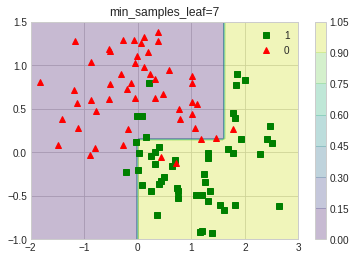

In [ ]:
tree_clf = DecisionTreeClassifier(random_state=42,min_samples_leaf=7)
tree_clf.fit(X,y)
plot_predictions(tree_clf)
create_plot()
plt.title("min_samples_leaf=7")
plt.show()

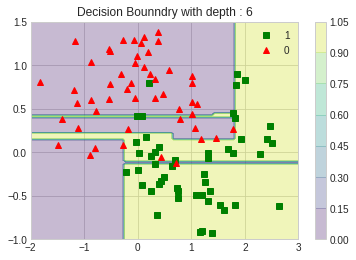

In [ ]:
tree_clf = DecisionTreeClassifier(max_depth=10)
tree_clf.fit(X,y)
plot_predictions(tree_clf)
create_plot()
plt.show()

# Implementing on the data

In [ ]:
#Load the data
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [ ]:
#Separate the input features and target
X = cancer.data
y = cancer.target

In [ ]:
X.shape

(569, 30)

In [ ]:
#Split into Train & Test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify = y,random_state = 5)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier(random_state=42)

In [ ]:
clf_tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
y_pred = clf_tree.predict(X_test)

In [ ]:
export_graphviz(clf_tree,
               out_file = "clf_tree.odt",
               feature_names = cancer.feature_names,
                class_names = cancer.target_names,
               filled = True)

In [ ]:
clf_tree_graph = pdot.graphviz.graph_from_dot_file("clf_tree.odt")

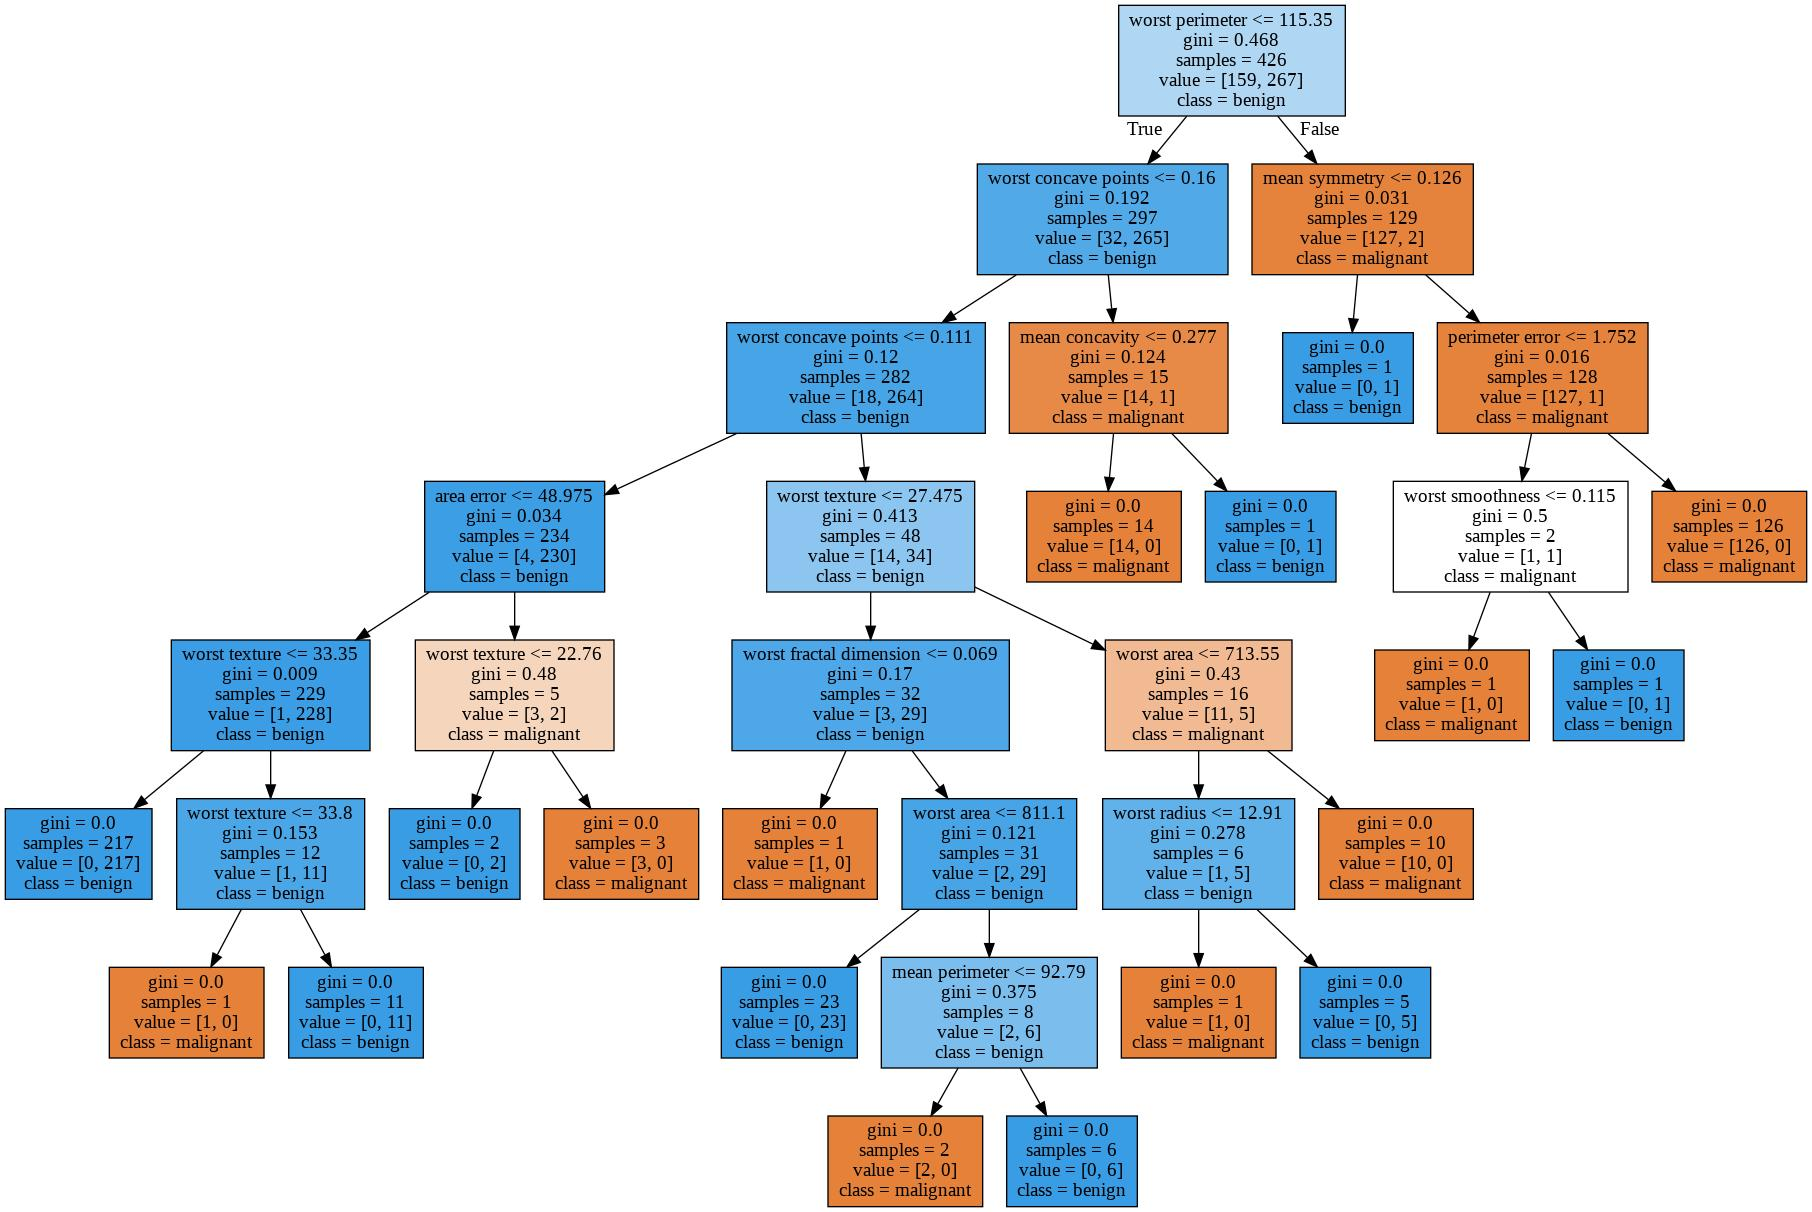

In [ ]:
clf_tree_graph.write_jpg("clf_tree.jpeg")
Image(filename = "clf_tree.jpeg")

In [ ]:
clf_tree.get_depth()

7

In [ ]:
from sklearn.metrics import roc_auc_score
y_train_pred = clf_tree.predict(X_train)
roc_auc_score(y_train,y_train_pred)

1.0

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf_tree,X_train,y_train, cv = 5, scoring = "roc_auc")

array([0.90972222, 0.94663915, 0.94663915, 0.90300708, 0.95609319])

In [ ]:
np.mean(cross_val_score(clf_tree,X_train,y_train, cv = 3, scoring = "roc_auc"))

0.9310296092148965

In [ ]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(clf_tree,X_train,y_train, cv = 5)

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = [{"max_depth" : range(2,8), 
               "min_samples_leaf": range(3,10),
               "max_leaf_nodes":range(5,15)}]

clf_tree = DecisionTreeClassifier(random_state = 42)

clf = GridSearchCV(clf_tree,
                  parameters,
                  cv = 5,
                  scoring = "roc_auc")

clf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'max_depth': range(2, 8),
                          'm

In [ ]:
clf.best_score_

0.9649519355402267

In [ ]:
clf.best_params_

{'max_depth': 3, 'max_leaf_nodes': 7, 'min_samples_leaf': 8}

In [ ]:
from sklearn.base import clone
best_tree = clone(clf.best_estimator_)

In [ ]:
best_tree.fit(X_train,y_train)

In [ ]:
best_tree = DecisionTreeClassifier(random_state = 42,
                                   max_depth = 3, 
                                   max_leaf_nodes=7,
                                   min_samples_leaf=8)
best_tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=7,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
cross_val_score(clf,X_train,y_train,scoring="roc_auc",cv = 5)

array([0.94010417, 0.99646226, 0.97051887, 0.94604953, 0.97162485])

In [ ]:
np.mean(cross_val_score(best_tree,X_train,y_train,scoring="roc_auc",cv = 5))

0.9649519355402267

In [ ]:
y_pred_test = best_tree.predict(X_test)
roc_auc_score(y_test,y_pred_test)

0.9361635220125787

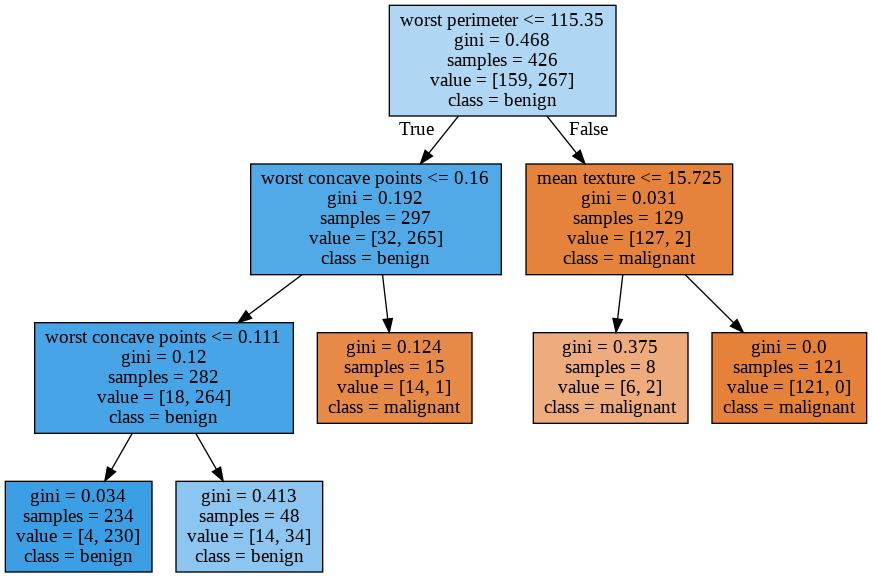

In [ ]:
#Create ODT file

export_graphviz(best_tree,
               out_file = "best_tree.odt",
               feature_names = cancer.feature_names,
                class_names = cancer.target_names,
               filled = True)

#Generate the Graph
clf_tree_graph = pdot.graphviz.graph_from_dot_file("best_tree.odt")

#Writing to a jpeg file
clf_tree_graph.write_jpg("best_tree.jpeg")

#Displaying the Image
Image(filename = "best_tree.jpeg")

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
y_pred_train = cross_val_predict(best_tree,X_train,y_train,cv=5)

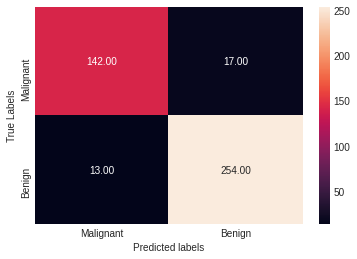

In [ ]:
cm = confusion_matrix(y_train,y_pred_train)
sns.heatmap(cm, annot = True, fmt = ".2f", 
            xticklabels=["Malignant","Benign"],
            yticklabels=["Malignant","Benign"] )
plt.xlabel("Predicted labels")
plt.ylabel("True Labels")
plt.show()

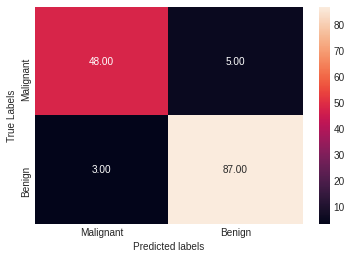

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test,y_pred_test)
sns.heatmap(cm, annot = True, fmt = ".2f", 
            xticklabels=["Malignant","Benign"],
            yticklabels=["Malignant","Benign"] )
plt.xlabel("Predicted labels")
plt.ylabel("True Labels")
plt.show()

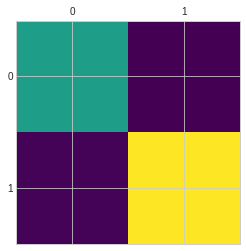

In [ ]:
plt.matshow(cm,cmap = "viridis")


In [ ]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{"criterion" : ["gini","entropy"],
                    "max_depth" : range(2,20)}]

clf_tree = DecisionTreeClassifier()

clf = GridSearchCV(clf_tree,
                  tuned_parameters,
                  cv = 10,
                  scoring = "roc_auc")

In [ ]:
clf.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'criterion': ['gini', 'entropy'],
                 

In [ ]:
clf.best_score_

0.9515446937321939

In [ ]:
clf.best_params_

{'criterion': 'entropy', 'max_depth': 3}

In [ ]:
#final fit
clf_tree = DecisionTreeClassifier(criterion="entropy",max_depth=3)
clf_tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred = clf_tree.predict(X_test)

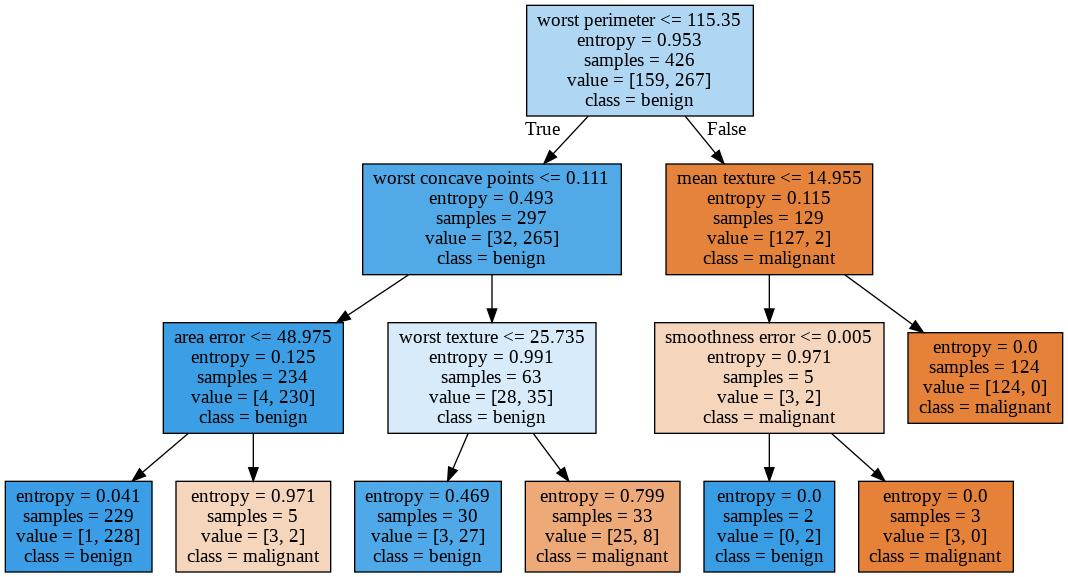

In [ ]:
export_graphviz(clf_tree,
               out_file = "final_tree.odt",
               feature_names = cancer.feature_names,
                class_names = cancer.target_names,
               filled = True)
chd_tree_graph = pdot.graphviz.graph_from_dot_file("final_tree.odt")
chd_tree_graph.write_jpg("final_tree.png")
Image(filename = "final_tree.png")